In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("../data/hour.csv")
df['atemp'] = df['atemp'] * 50
df['hum'] = df['hum'] * 100
df['windspeed'] = df['windspeed'] * 67

# Drop unnecessary columns
df = df.drop(['casual', 'registered', 'dteday', 'instant'], axis=1)

# Separate features and target
X = df.drop(['cnt'], axis=1)
y = df['cnt']

## Train model for LinearRegression

#Training and Testing data with train test split
## How to Use Train Test Split

1. split a dataset into a training and testing set
2. Provide the testing size with the test_size parameter
3. Train a model on the training set
4. Make predictions on the training set
5. Compute the accuracy with a metrics such as the accuracy or accuracy_score

In [3]:

# print(X)
# encode categorical variables
categorical_cols = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
# print(categorical_cols)

#get_dummies() to convert categorical variables into dummy variables
#  A dummy variable is a variable that takes on the values 1 and 0; 1 means something is true
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (critical for numerical stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

       yr  holiday  workingday  temp   atemp   hum  windspeed  season_2  \
0       0        0           0  0.24  14.395  81.0     0.0000     False   
1       0        0           0  0.22  13.635  80.0     0.0000     False   
2       0        0           0  0.22  13.635  80.0     0.0000     False   
3       0        0           0  0.24  14.395  75.0     0.0000     False   
4       0        0           0  0.24  14.395  75.0     0.0000     False   
...    ..      ...         ...   ...     ...   ...        ...       ...   
17374   1        0           1  0.26  12.880  60.0    11.0014     False   
17375   1        0           1  0.26  12.880  60.0    11.0014     False   
17376   1        0           1  0.26  12.880  60.0    11.0014     False   
17377   1        0           1  0.26  13.635  56.0     8.9981     False   
17378   1        0           1  0.26  13.635  65.0     8.9981     False   

       season_3  season_4  ...  hr_23  weekday_1  weekday_2  weekday_3  \
0         False     False

/Users/level3/Desktop/ml-ops-part-1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/Desktop/ml-ops-part-1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/Desktop/ml-ops-part-1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


(17379, 53) (17379,)


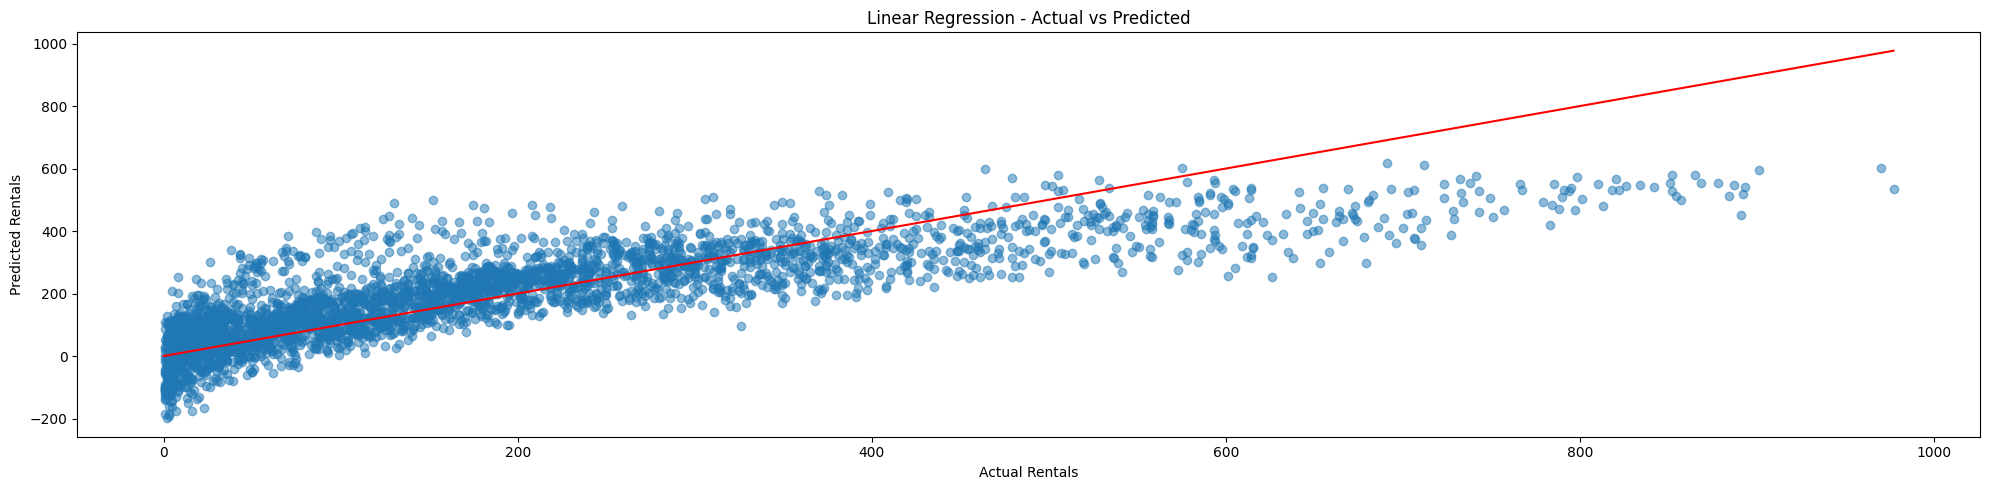

In [4]:
# check the length of the feature and the length of the cnt are the same
print(X.shape, y.shape)

# Compare actual vs predicted
plt.figure(figsize=(20,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Linear Regression - Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.tight_layout()
plt.show()


## Train model for RandomForestRegressor

In [5]:
# Select features and target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred) ** 0.5 
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

 RMSE: 51.99
 R² Score: 0.91


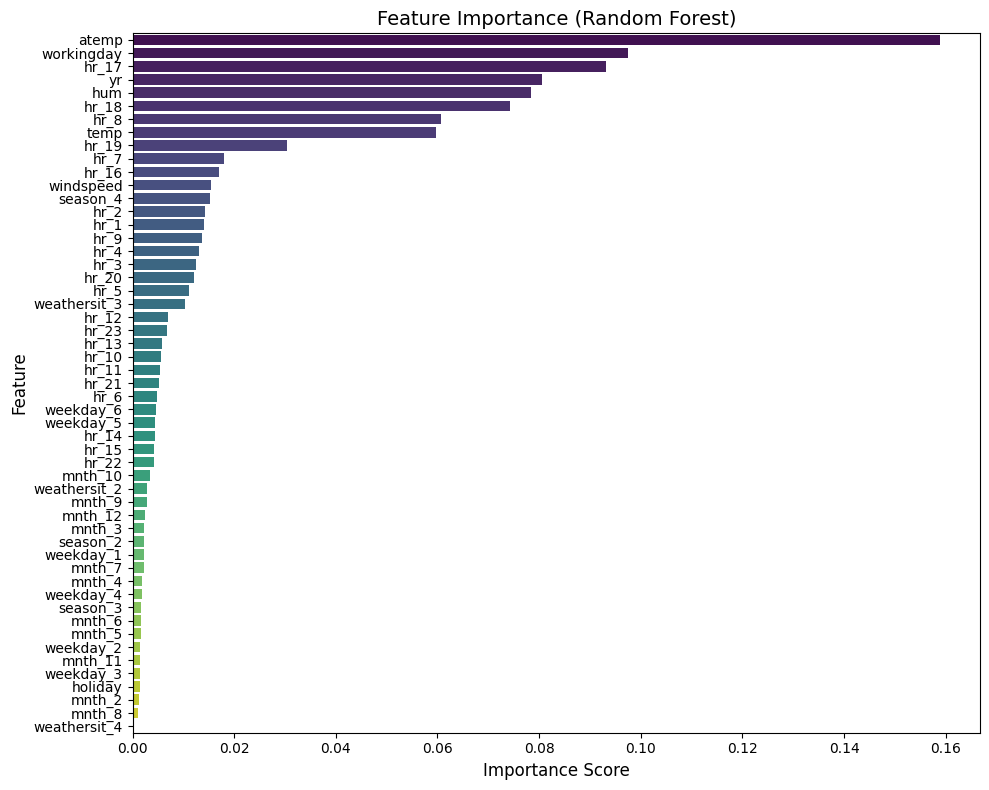

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and names
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for easy sorting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)  # Sort by importance

# Set up the plot
plt.figure(figsize=(10, 8))  # More reasonable size than (50, 100)

# Create barplot
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis')

# Add titles and labels
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()

plt.show()

## Train model XGBRegressor

In [7]:
# Initialize model (with basic hyperparameters)
model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Tree depth (control complexity)
    learning_rate=0.1, # Step size shrinkage
    random_state=42,
    enable_categorical=True  # Essential for categorical support!
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.90


In [8]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(XGBRegressor(enable_categorical=True), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best R²:", grid.best_score_)

Best params: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Best R²: 0.9205025235811869
